#  🐕 Dog breed recognition: classification

|   |   |
|---|---|
| Project  |    [Classez des images à l'aide d'algorithmes de Deep Learning](https://openclassrooms.com/fr/paths/148/projects/634/assignment)         |
| Date   |   March 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) |
| Mentor | Samir Tanfous | 
| Notebook number  | 2 of _                                                    |

**Description:** In this notebook we 

# Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/colab-notebooks/data

/content/drive/MyDrive/colab-notebooks/data


In [5]:
ls

images/            save_at_14.keras  save_at_20.keras  save_at_3.keras
images_sample_10/  save_at_15.keras  save_at_21.keras  save_at_4.keras
model.png          save_at_16.keras  save_at_22.keras  save_at_5.keras
save_at_10.keras   save_at_17.keras  save_at_23.keras  save_at_6.keras
save_at_11.keras   save_at_18.keras  save_at_24.keras  save_at_7.keras
save_at_12.keras   save_at_19.keras  save_at_25.keras  save_at_8.keras
save_at_13.keras   save_at_1.keras   save_at_2.keras   save_at_9.keras


In [5]:
! ls images_sample_10

n02085620-Chihuahua	     n02096294-Australian_terrier  n02105412-kelpie
n02086910-papillon	     n02097298-Scotch_terrier	   n02107142-Doberman
n02088364-beagle	     n02099601-golden_retriever
n02094433-Yorkshire_terrier  n02105162-malinois


# Generate dataset

In [6]:
image_size = (224, 224)
batch_size = 8 # 4, 8 16

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "images_sample_10",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    validation_split=0.3,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1664 files belonging to 10 classes.
Using 1165 files for training.
Using 499 files for validation.


In [7]:
breed_names = train_ds.class_names
breed_names = {idx:breed for idx,breed in enumerate(breed_names)}
print(breed_names)

{0: 'n02085620-Chihuahua', 1: 'n02086910-papillon', 2: 'n02088364-beagle', 3: 'n02094433-Yorkshire_terrier', 4: 'n02096294-Australian_terrier', 5: 'n02097298-Scotch_terrier', 6: 'n02099601-golden_retriever', 7: 'n02105162-malinois', 8: 'n02105412-kelpie', 9: 'n02107142-Doberman'}


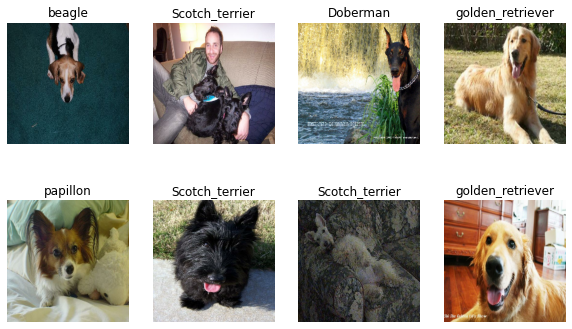

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        dir_name = breed_names[int(labels[i])]
        breed_name = dir_name.split('-')[1]
        plt.title(breed_name)
        plt.axis("off")

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


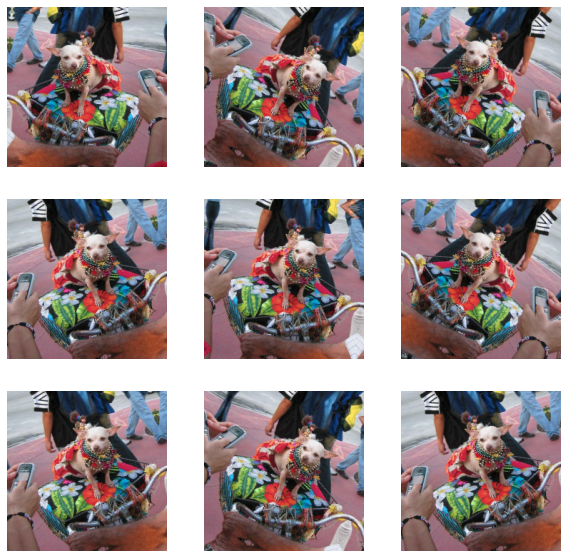

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# CNN from scratch

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

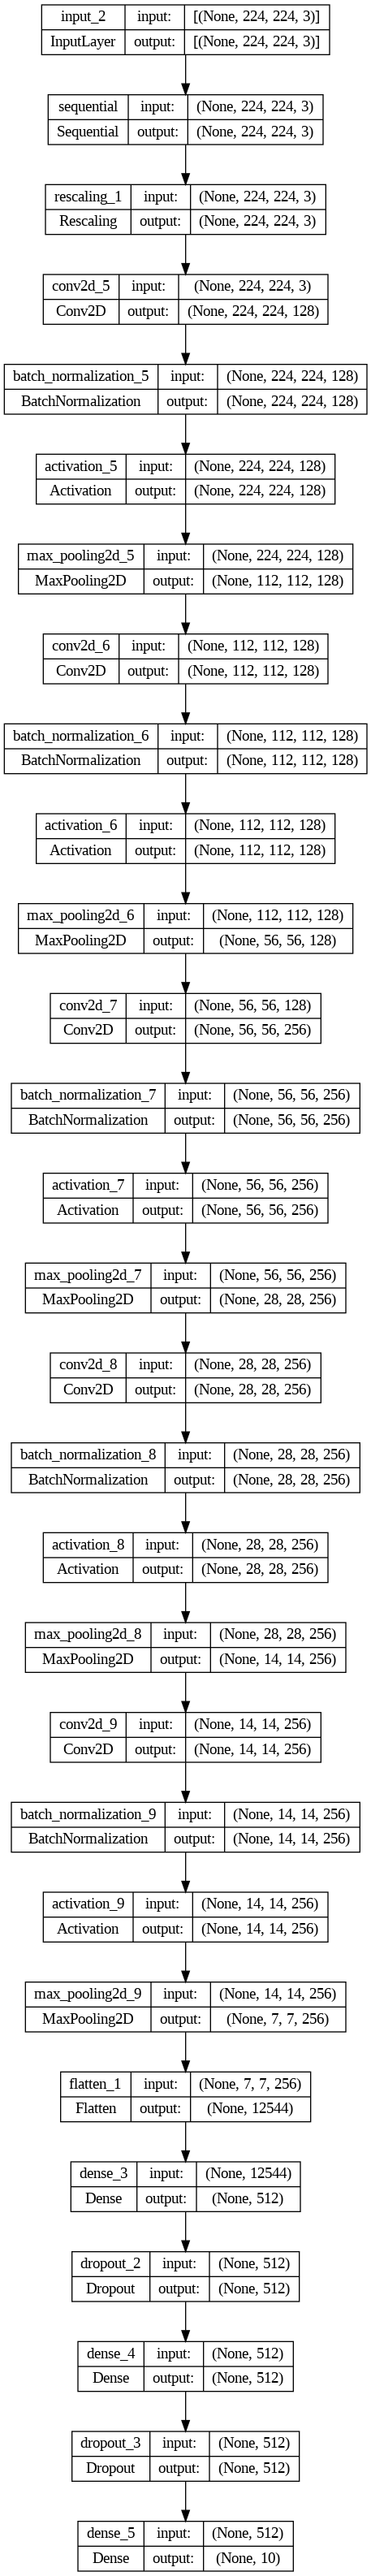

In [13]:
def make_cnn_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Preprocessing
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(x)

    # # First block:
    # x = layers.Conv2D(filters=64,
    #                   kernel_size=3,
    #                   strides=(1,1),
    #                   padding="same")(x)  # for having outputsize=inputsize
    # x = layers.BatchNormalization()(x)
    # x = layers.Activation("relu")(x)

    # x = layers.Conv2D(filters=64,
    #                   kernel_size=3,
    #                   strides=(1,1),
    #                   padding="same")(x)  # for having outputsize=inputsize
    # x = layers.BatchNormalization()(x)
    # x = layers.Activation("relu")(x)

    # x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)

    # Second block
    x = layers.Conv2D(filters=128,
                      kernel_size=3,
                      strides=(1,1),
                      padding="same")(x)  # for having outputsize=inputsize
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)
    #
    x = layers.Conv2D(filters=128,
                      kernel_size=3,
                      strides=(1,1),
                      padding="same")(x)  # for having outputsize=inputsize
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    #
    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)

    # Third block
    x = layers.Conv2D(filters=256,
                      kernel_size=3,
                      strides=(1,1),
                      padding="same")(x)  # for having outputsize=inputsize
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)

    x = layers.Conv2D(filters=256,
                      kernel_size=3,
                      strides=(1,1),
                      padding="same")(x)  # for having outputsize=inputsize
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)
    x = layers.Conv2D(filters=256,
                      kernel_size=3,
                      strides=(1,1),
                      padding="same")(x)  # for having outputsize=inputsize
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same")(x)

    # Third block
    x = layers.Flatten()(x)

    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    return keras.Model(inputs,outputs)


model = make_cnn_model(input_shape=image_size + (3,))
keras.utils.plot_model(model, show_shapes=True)
    


In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 224, 224, 128)     0         
                                                           

## Training

In [15]:
epochs = 10

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

Epoch 1/10


146/146 [==============================] - 538s 4s/step - loss: 6.4795 - accuracy: 0.1262 - val_loss: 2.3087 - val_accuracy: 0.1142
Epoch 2/10
146/146 [==============================] - 15s 100ms/step - loss: 2.3125 - accuracy: 0.1056 - val_loss: 2.2995 - val_accuracy: 0.1142
Epoch 3/10
146/146 [==============================] - 15s 99ms/step - loss: 2.3018 - accuracy: 0.1142 - val_loss: 2.2980 - val_accuracy: 0.1142
Epoch 4/10
146/146 [==============================] - 15s 100ms/step - loss: 2.3006 - accuracy: 0.1185 - val_loss: 2.2972 - val_accuracy: 0.1142
Epoch 5/10
146/146 [==============================] - 15s 99ms/step - loss: 2.2979 - accuracy: 0.1193 - val_loss: 2.2969 - val_accuracy: 0.1142
Epoch 6/10
146/146 [==============================] - 15s 99ms/step - loss: 2.2984 - accuracy: 0.1047 - val_loss: 2.2966 - val_accuracy: 0.1142
Epoch 7/10
146/146 [==============================] - 14s 98ms/step - loss: 2.2967 - accuracy: 0.1159 - val_loss: 2.2965 - val_accuracy: 0.1142
Ep